# Basics of Supervised Learning
- Learn from (input, output) pairs
- Generalize to new input, predict unknown output

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [7]:
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)

<IPython.core.display.Javascript object>

In [8]:
digits.target[0]

0

In [9]:
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

<IPython.core.display.Javascript object>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target)

Really Simple API
-------------------
0) Import your model class

In [11]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [12]:
svm = LinearSVC()

2) Fit the model

In [13]:
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [14]:
print(svm.predict(X_train))
print(y_train)

[6 6 2 ..., 2 3 6]
[6 6 2 ..., 2 3 6]


In [15]:
svm.score(X_train, y_train)

0.99109131403118045

In [16]:
svm.score(X_test, y_test)

0.94888888888888889

And again
---------

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=50)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rf.score(X_test, y_test)

0.98444444444444446

# Exercise
Load the iris dataset from seaborn using

```python
iris = sns.load_dataset("iris")
```
Visualize the dataset. Extract the features (independent variables) and the target (dependent variable).
Split it into training and test set using ``train_test_split``.


Then train an evaluate a classifier of your choice. Try ``sklearn.neighbors.KNeighborsClassifier`` or ``sklearn.ensemble.RandomForestClassifier`` for example.


In [21]:
# your solution

# Dummy encoding of categorical variables

In [26]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,boro,salary
0,Manhatten,103
1,Queens,89
2,Manhatten,142
3,Brooklyn,54
4,Brooklyn,63
5,Bronx,219


In [27]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [28]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


In [29]:
pd.get_dummies(df)

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


# Exercise
Load the california housing data from data/housing.csv and apply dummy encoding.

In [ ]:
# solution

# Scaling data

In [32]:
import seaborn.apionly as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
X = iris.iloc[:, :-1]  # could do iris.pop("species") but that is changing "iris"
y = iris.species
X.shape

(150, 4)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [41]:
X_train_scaled[:10]

array([[-1.01099825, -2.30005392, -0.15148942, -0.27585067],
       [-1.12773206, -0.08694362, -1.32740725, -1.32760471],
       [-1.71140115, -0.30825465, -1.32740725, -1.32760471],
       [-1.01099825, -1.63612083, -0.26348159, -0.27585067],
       [-1.12773206, -1.19349877,  0.40847146,  0.64443411],
       [ 0.50654139, -1.19349877,  0.6884519 ,  0.90737262],
       [ 0.50654139, -1.63612083,  0.35247537,  0.1185571 ],
       [-1.01099825,  1.01961153, -1.38340334, -1.19613545],
       [ 0.27307375, -0.52956568,  0.52046363, -0.01291216],
       [-1.01099825,  1.01961153, -1.21541508, -0.80172769]])

In [40]:
X_test_scaled = scaler.transform(X_test)

In [42]:
svm = LinearSVC()
svm.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [43]:
svm.predict(X_test_scaled)

array(['setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica'], dtype=object)

In [44]:
svm.score(X_test_scaled, y_test)

0.94736842105263153

# Exercise
- load the california housing data and drop columns with missing values
- Separate features and target in the california housing dataset (with dummy encoding)
- use train_test_split to split it into training and test data
- use the StandardScaler to scale training and test data
- Fit the sklearn.linear_modle.Ridge model (ridge regression, a linear regression model) and evaluate it on the test data.

Note: the score method computes the R^2 for regression problems

In [70]:
# solution here

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_test_scaled, y_test))
print(ridge.score(X_train_scaled, y_train))

0.641947273806
0.647874111662


In [81]:
# Inspecting the ridge model

In [82]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [83]:
ridge.coef_

array([-53216.54321031, -53915.49590648,  13735.95772092, -12435.58451893,
        43110.73433477, -42588.98582516,  16842.51439083,  74648.28320843,
         6380.39206451, -12520.20644736,   2398.01692766,   2533.79982991,
         5464.4191963 ])

<IPython.core.display.Javascript object>


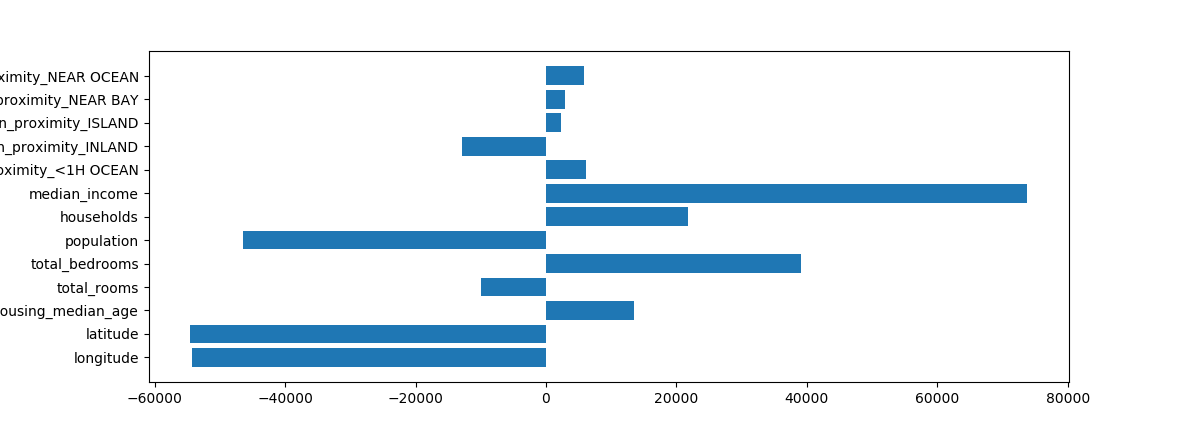

In [78]:
plt.figure()
plt.barh(range(len(ridge.coef_)), ridge.coef_)
plt.yticks(range(len(ridge.coef_)), X_train.columns);

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])